In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('/content/credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [5]:
df.shape

(32581, 12)

In [6]:
#Fill missing columns
c=['person_emp_length','loan_int_rate']
for i in c:
  df[i]=df[i].fillna(df[i].mean())


In [7]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


In [8]:
categorical_columns=list(df.select_dtypes(include=['object']).columns)

In [9]:
categorical_columns

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [10]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [11]:
numerical_columns=list(df.select_dtypes(exclude='object'))

In [12]:
numerical_columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [13]:
#Encode Categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in categorical_columns:
  df[i]=le.fit_transform(df[i])

In [14]:
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


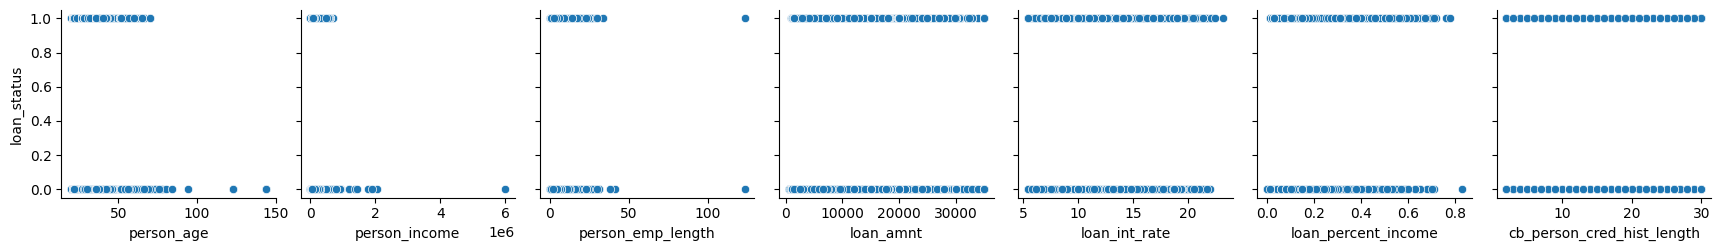

In [15]:
sns.pairplot(x_vars=['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length'],y_vars=['loan_status'],data=df)

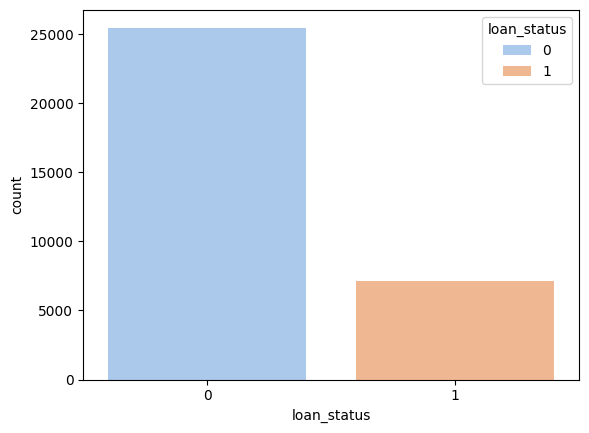

In [16]:
ax=sns.countplot(x='loan_status',data=df,hue='loan_status',palette='pastel')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4


In [17]:
##The data is highly imbalanced
#!pip install imblearn
from imblearn.over_sampling import SMOTE
st=SMOTE()
X=df.drop('loan_status',axis=1)
Y=df['loan_status']
X_train,y_train=st.fit_resample(X,Y)


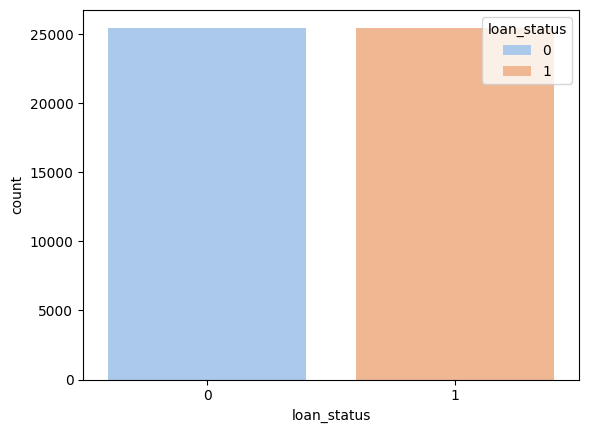

In [18]:
df_merged=pd.concat([X_train,y_train],axis=1)

ax=sns.countplot(x='loan_status',data=df_merged,hue='loan_status',palette='pastel')

In [19]:
df_merged.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


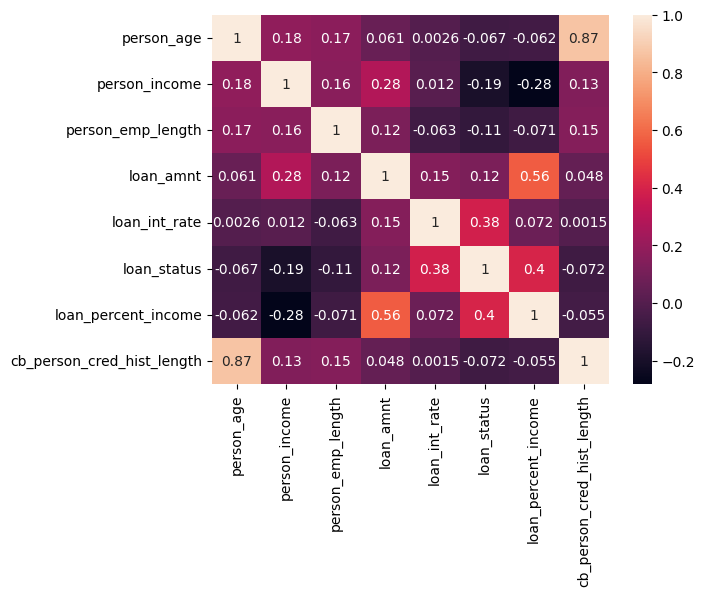

In [20]:
ax=sns.heatmap(df_merged[numerical_columns].corr(),annot=True)

In [21]:
df_merged.describe()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
count,50946.000000,5.094600e+04,50946.000000,50946.000000,50946.000000,50946.000000,50946.000000,50946.000000,50946.000000,50946.000000,50946.000000,50946.000000
mean,27.410356,6.007228e+04,1.834491,4.548385,2.313548,1.384466,10039.307325,11.667331,0.197604,0.150591,5.563263,0.500000
std,5.943997,5.507375e+04,1.366469,3.828639,1.639795,1.184902,6650.447437,3.082757,0.122011,0.357653,3.818671,0.500005
min,20.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000,0.000000
25%,23.000000,3.400000e+04,0.000000,2.000000,1.000000,0.000000,5000.000000,9.703587,0.100000,0.000000,3.000000,0.000000
50%,26.000000,5.000000e+04,3.000000,4.000000,2.000000,1.000000,8500.000000,11.490000,0.170000,0.000000,4.000000,0.500000
75%,30.000000,7.265775e+04,3.000000,6.175268,4.000000,2.000000,14000.000000,13.955357,0.280000,0.000000,8.000000,1.000000
max,144.000000,6.000000e+06,3.000000,123.000000,5.000000,6.000000,35000.000000,23.220000,0.830000,1.000000,30.000000,1.000000


In [22]:
def find_outliers_IQR(df):
  q1=df.quantile(0.25)
  q3=df.quantile(0.75)
  IQR=q3-q1
  lower_limit=q1-1.5*IQR
  upper_limit=q3+1.5*IQR
  outliers = df[((df<(lower_limit)) | (df>(upper_limit)))]
  return upper_limit,lower_limit

In [23]:
new_df_cap = df_merged.copy()
outlier_cols=['person_age','person_income','person_emp_length','cb_person_cred_hist_length']
for i in outlier_cols:
  upper_limit,lower_limit=find_outliers_IQR(new_df_cap[i])
  new_df_cap[i] = np.where(
      new_df_cap[i] > upper_limit,
      upper_limit,
      np.where(
          new_df_cap[i] < lower_limit,
          lower_limit,
          new_df_cap[i]
      )
  )

In [24]:
new_df_cap.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


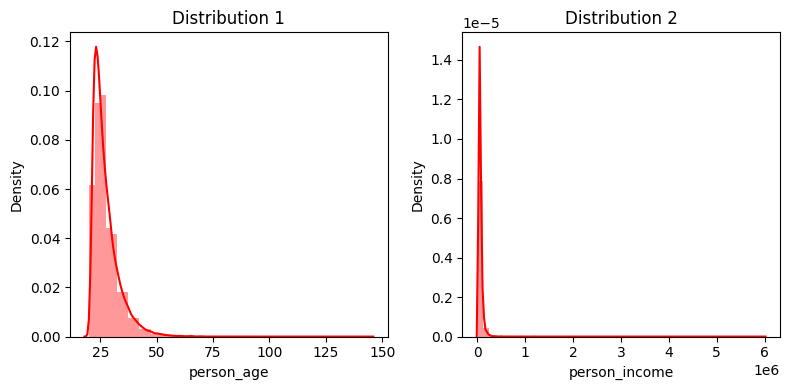

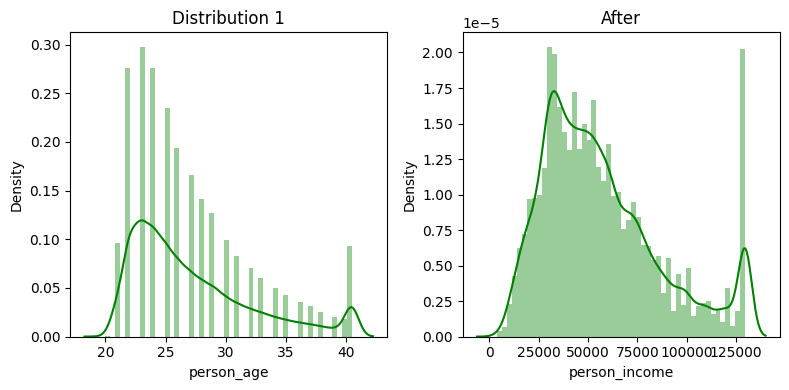

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
# Create a figure with 1 row and 2 columns of subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4)) # Adjust figsize as needed

# Plot the first distplot on ax1
sns.distplot(df_merged['person_age'], ax=ax1,color='red')
ax1.set_title('Distribution 1')
plt.title('Before')
# Plot the second distplot on ax2
sns.distplot(df_merged['person_income'], ax=ax2,color='red')
ax2.set_title('Distribution 2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot

plt.show()
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4)) # Adjust figsize as needed

# Plot the first distplot on ax1
sns.distplot(new_df_cap['person_age'], ax=ax1,color='green')
ax1.set_title('Distribution 1')

# Plot the second distplot on ax2
sns.distplot(new_df_cap['person_income'], ax=ax2,color='green')
ax2.set_title('Distribution 2')
plt.title('After')
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [26]:
new_df_cap.to_csv('credit_risk_cleaned.csv')

####now the data is balanced, does not contain nulls , does not contain outliers and the categorical variables are encoded.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mn=MinMaxScaler()
new_df_cap[numerical_columns] = mn.fit_transform(new_df_cap[numerical_columns])

In [ ]:
X=np.array(new_df_cap.drop('loan_status',axis=1))
y=np.array(new_df_cap['loan_status']).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=67)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('Training Accuracy :',int(accuracy_score(y_train,y_train_pred)*100))
print('Testing Accuracy :',int(accuracy_score(y_test,y_test_pred)*100))

Training Accuracy : 77
Testing Accuracy : 77


In [ ]:
#Now try random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('Training Accuracy :',int(accuracy_score(y_train,y_train_pred)*100))
print('Testing Accuracy :',int(accuracy_score(y_test,y_test_pred)*100))

Training Accuracy : 100
Testing Accuracy : 92


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model=XGBClassifier()
model.fit(X_train,y_train)
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)
print('Training Accuracy :',int(accuracy_score(y_train,y_train_pred)*100))
print('Testing Accuracy :',int(accuracy_score(y_test,y_test_pred)*100))

Training Accuracy : 96
Testing Accuracy : 94
